# Energy
Analytics in power plants can reduce unexpected equipment failures by predicting when a component might fail, thus helping reduce maintenance costs and improve power availability.

Utilities can also predict when customers might get a high bill and send out customer alerts to warn customers they are running up a large bill that month. Smart meters allowed utilities to warn customers of spikes at certain times of the day, helping them to know when to cut back on power use.

# Data Product
    This program uses artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing price of a corporaiton (Apple Inc,) using the past 60 days stock price

In [69]:
# Import the librarties
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [70]:
# Get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2020-06-14', end = '2020-12-15')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-15,86.419998,83.144997,83.312500,85.747498,34702200.0,85.445755
2020-06-16,88.300003,86.180000,87.864998,88.019997,41276300.0,87.710258
2020-06-17,88.849998,87.772499,88.787498,87.897499,114406400.0,87.588196
2020-06-18,88.362503,87.305000,87.852501,87.932503,96820400.0,87.623077
2020-06-19,89.139999,86.287498,88.660004,87.430000,264476000.0,87.122337
...,...,...,...,...,...,...
2020-12-09,125.949997,121.000000,124.529999,121.779999,115089200.0,121.779999
2020-12-10,123.870003,120.150002,120.500000,123.239998,81312200.0,123.239998
2020-12-11,122.760002,120.550003,122.430000,122.410004,86939800.0,122.410004


In [71]:
# Get the stock quote from MU
df1 = web.DataReader('MU', data_source = 'yahoo', start = '2014-12-14', end = '2020-12-15')
# Show the data
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-15,34.450001,33.250000,34.349998,33.349998,27305700,33.349998
2014-12-16,33.919998,32.369999,32.900002,32.919998,28611600,32.919998
2014-12-17,33.900002,32.500000,33.080002,33.830002,19434600,33.830002
2014-12-18,34.790001,34.049999,34.619999,34.450001,18200600,34.450001
2014-12-19,34.799999,34.130001,34.590000,34.490002,18469600,34.490002
...,...,...,...,...,...,...
2020-12-09,74.610001,70.779999,73.150002,71.410004,18367300,71.410004
2020-12-10,71.949997,69.669998,70.139999,71.279999,15610600,71.279999
2020-12-11,71.320000,69.400002,70.379997,70.529999,15322000,70.529999


In [72]:
# Get the number of rows and columns in the data set
df1.shape

(1512, 6)

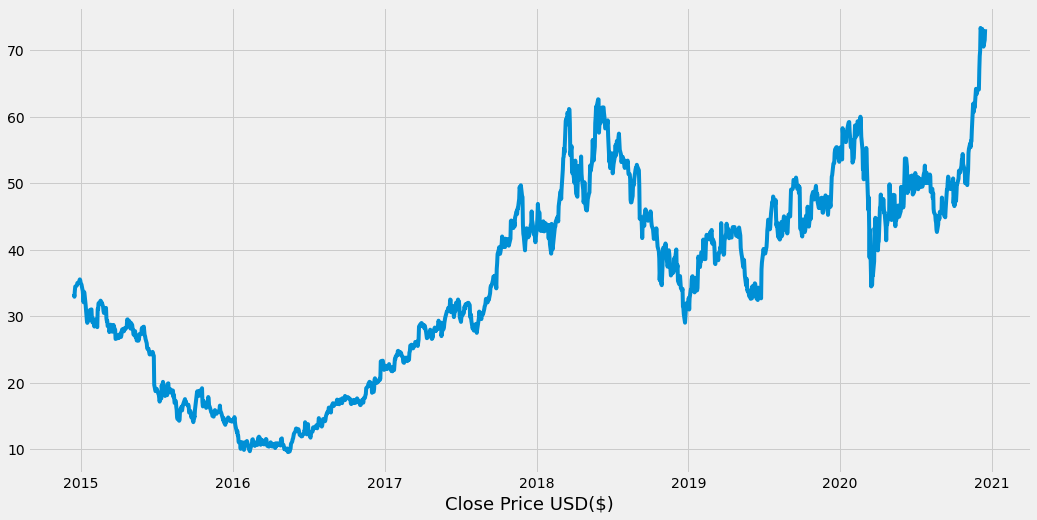

In [73]:
# Visualize the closing price history
plt.figure(figsize = (16, 8))
plt.title = ('Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize = 18)
plt.xlabel('Close Price USD($)', fontsize = 18)
plt.show()

In [74]:
# Create a new dataframe with only the 'Close column'
data = df1.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1210

In [75]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.37300093],
       [0.366259  ],
       [0.38052686],
       ...,
       [0.95594234],
       [0.97177806],
       [0.99702109]])

In [76]:
# Create the training dataset
# Create  the scaled training data set
train_data = scaled_data[0: training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.37300093, 0.366259  , 0.38052686, 0.39024776, 0.39087493,
       0.39322673, 0.39840079, 0.39746004, 0.39887114, 0.40718093,
       0.40514272, 0.3990279 , 0.39495141, 0.37974286, 0.36547507,
       0.35340231, 0.37801818, 0.37582314, 0.34650362, 0.33364693,
       0.32126059, 0.30950141, 0.30464096, 0.31530262, 0.32815931,
       0.33443086, 0.33537162, 0.33646913, 0.31498903, 0.30636565,
       0.31592976, 0.30903106, 0.29601758, 0.30401382, 0.30526813,
       0.31248041, 0.30338665, 0.29460648, 0.33756665, 0.33646913,
       0.35089372, 0.34948262, 0.35700851, 0.35449983, 0.34885545,
       0.35230479, 0.3424271 , 0.33254941, 0.32800252, 0.33019758,
       0.33098151, 0.33991848, 0.31514582, 0.30903106, 0.30918786,
       0.29695831, 0.29946693, 0.2830041 , 0.28723738, 0.28943244])]
[0.30040765318155443]



In [77]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [78]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1150, 60, 1)

In [79]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [80]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [81]:
# Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1150/1150 [==============================] - 23s 20ms/step - loss: 0.0024


In [82]:
# Create the testing data set
# Create a new array containing scaled values from index 1149 to 1209
test_data = scaled_data[training_data_len - 60:, :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])

In [83]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [84]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [85]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [86]:
# Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.9360080112684641

In [87]:
# PLot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data

<ipython-input-87-9259bbe95a36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


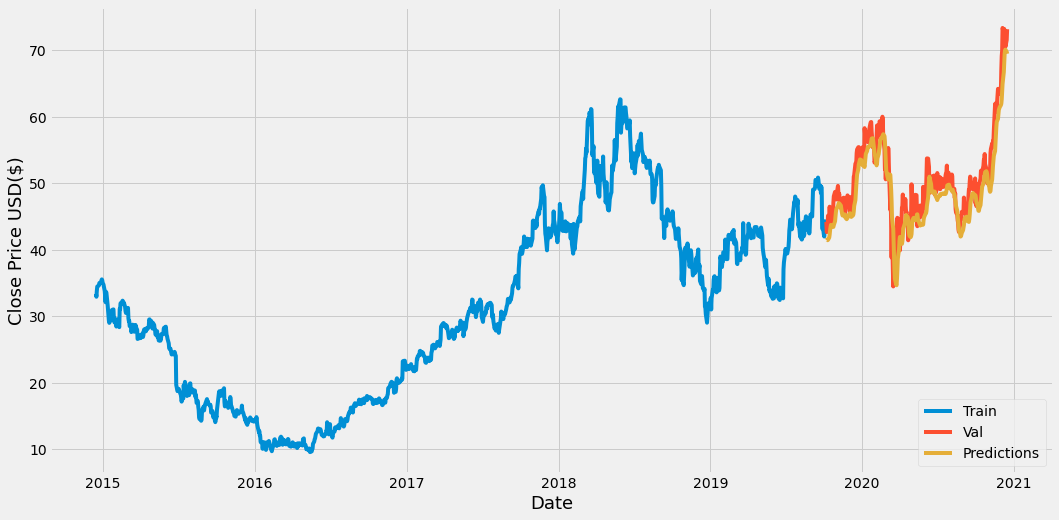

In [88]:
plt.figure(figsize = (16, 8))
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18 )
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [89]:
# Show the valid and predicted prices
valid 

,Close,Predictions
Date,,
2019-10-07,44.160000,41.435284
2019-10-08,42.639999,41.497849
2019-10-09,42.880001,41.457478
2019-10-10,43.279999,41.425507
2019-10-11,45.099998,41.467125
...,...,...
2020-12-09,71.410004,69.458412
2020-12-10,71.279999,70.001884
2020-12-11,70.529999,70.077103


In [90]:
# Get the quote
mu_quote = web.DataReader('mu', data_source = 'yahoo',  start = '2014-12-14', end = '2020-12-15')
# Create a new dataframe
new_df = mu_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty lst
X_test = []
# Append the past 60 days 
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[69.50273]]


In [91]:
# Get the quote
mu_quote2 = web.DataReader('mu', data_source = 'yahoo',  start = '2014-12-16', end = '2020-12-16')
print(mu_quote2['Close'])

Date
2014-12-16    32.919998
2014-12-17    33.830002
2014-12-18    34.450001
2014-12-19    34.490002
2014-12-22    34.639999
                ...    
2020-12-09    71.410004
2020-12-10    71.279999
2020-12-11    70.529999
2020-12-14    71.540001
2020-12-15    73.150002
Name: Close, Length: 1511, dtype: float64
